In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [15]:
# importing the libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
# load the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)
# here Num_words is the number of words to keep. The most common num_words-1 words will be kept.

In [17]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [18]:
# apply padding
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [20]:
x_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]])

In [21]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Step 3: Model building


In [22]:
# define an object(initialling RNN)
model = tf.keras.models.Sequential()


In [23]:
x_train.shape

(25000, 100)

In [24]:
# embedding layer
# it is used to convert the words into vectors
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_shape=(x_train.shape[1],)))

In [25]:
# LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

In [26]:
#output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [28]:
# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 100), (25000,), (25000, 100), (25000,))

# Step 4: Model training

In [30]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 67s 328ms/step - loss: 0.5438 - accuracy: 0.7095 - val_loss: 0.4179 - val_accuracy: 0.8105
Epoch 2/5
196/196 [==============================] - 62s 317ms/step - loss: 0.3481 - accuracy: 0.8536 - val_loss: 0.5371 - val_accuracy: 0.7922
Epoch 3/5
196/196 [==============================] - 63s 323ms/step - loss: 0.2843 - accuracy: 0.8870 - val_loss: 0.3489 - val_accuracy: 0.8519
Epoch 4/5
196/196 [==============================] - 64s 325ms/step - loss: 0.2388 - accuracy: 0.9079 - val_loss: 0.4379 - val_accuracy: 0.8396
Epoch 5/5
196/196 [==============================] - 63s 319ms/step - loss: 0.2107 - accuracy: 0.9210 - val_loss: 0.4635 - val_accuracy: 0.7997


In [31]:
# prediction
y_pred = model.predict(x_test)

782/782 [==============================] - 41s 50ms/step


In [32]:
y_pred = np.round(y_pred).astype(int)

In [33]:
y_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [34]:
y_pred.shape

(25000, 1)

In [36]:
y_test.shape

(25000,)

In [37]:
y_pred = y_pred.reshape(25000,)

In [38]:
y_pred.shape

(25000,)

In [39]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
# import confusion matrix,  accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score


In [41]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[11831,   669],
       [ 4338,  8162]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred)

0.79972

# Learning Curve

In [45]:
def learning_curve(history, epoch):
    # training vs validation accuracy
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # training vs validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

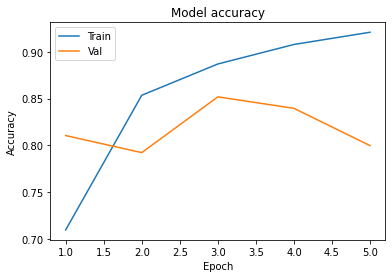

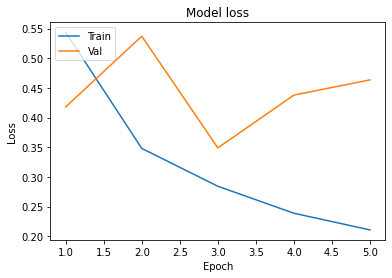

In [46]:
learning_curve(history, 5)